In [1]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

steps:
- import csv
- plot basic info- maybe histograms
- make cut offs
- ideally also visualize

In [2]:
# import csv
csv_file_name = "/Users/emilydennis/Desktop/mtb/z267_cell_measures.csv"

In [3]:
df = pd.read_csv (csv_file_name)
df.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'intensity', 'maximum perimeter',
       'no_voxels', 'sphericity', 'val', 'x', 'y', 'z', 'z depth'],
      dtype='object')

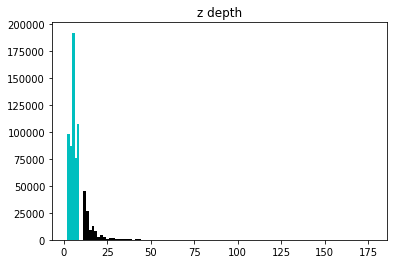

In [4]:
zlim = 10

zdepth = df['z depth']
goodzdepth = zdepth[zdepth < zlim]
badzdepth = zdepth[zdepth > zlim]
plt.figure()
# we are imaging at ~10 micron, expect soma < 150mm2 (generously, also allows for clumps of cells)
#plt.hist([goodzdepth, badzdepth], bins=50)

plt.hist(goodzdepth, bins=5, facecolor='c')
plt.hist(badzdepth, bins=100, facecolor='k')
plt.title('z depth')
plt.show()

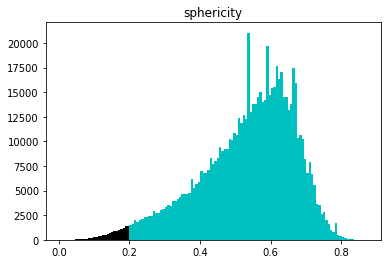

In [5]:
slim=0.2

sphericity = df['sphericity']
goodsphericity = sphericity[sphericity > slim]
badsphericity = sphericity[sphericity < slim]
# we are imaging at ~10 micron, expect soma < 100mm2 (generously, also allows for clumps of cells)
plt.figure
plt.hist(goodsphericity,bins=100, facecolor='c')
plt.hist(badsphericity,bins=30, facecolor='k')
plt.title('sphericity')
plt.show()

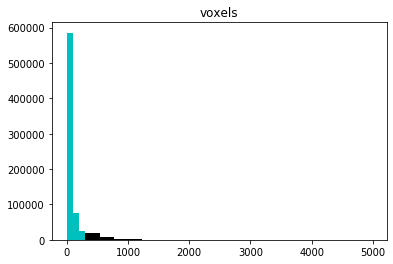

In [6]:
vlim = 300

vox = df['no_voxels']
realvox = vox[vox < 5000]
badvox = realvox[realvox > vlim]
plt.figure()
plt.hist(realvox,bins=50, facecolor='c')
plt.hist(badvox,bins=20, facecolor='k')
plt.title('voxels')
plt.show()


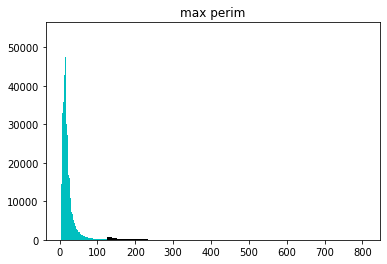

In [7]:
mplim = 125

mp = df['maximum perimeter']
goodmp = mp[mp < mplim]
badmp = mp[mp > mplim]
plt.figure()
plt.hist(goodmp,bins=100, facecolor='c')
plt.hist(badmp,bins=50, facecolor='k')
plt.title('max perim')
plt.show()

In [15]:
singlezplane = df[df.z < 300]
singlezplane = singlezplane[singlezplane.z > 298]
singlezplane.columns

singlezplane.columns = ['num1', 'num2','intensity', 'maximum_perimeter', 'no_voxels', 'sphericity', 'val', 'x', 'y', 'z', 'z_depth']
singlez_z = singlezplane[singlezplane.z_depth > zlim]
singlez_v = singlez_z[singlez_z.no_voxels > vlim]
singlez_mp = singlez_v[singlez_v.maximum_perimeter > mplim]
singlez_s = singlez_mp[singlez_mp.sphericity < slim]

sub = singlezplane[singlezplane.z_depth < zlim]
sub = sub[sub.no_voxels < vlim]
sub = sub[sub.maximum_perimeter < mplim]
sub = sub[sub.sphericity > slim]

<function matplotlib.pyplot.show(*args, **kw)>

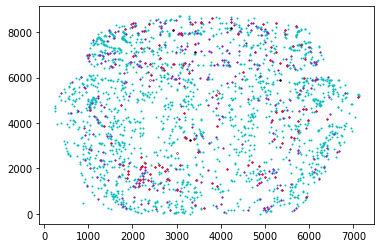

In [16]:
plt.figure
plt.scatter(singlezplane.x,singlezplane.y,s=1,facecolor='c')
plt.scatter(singlez_z.x,singlez_z.y,s=1,facecolor='m')
plt.scatter(singlez_v.x,singlez_v.y,s=1,facecolor='r')
plt.scatter(singlez_mp.x,singlez_mp.y,s=1,facecolor='k')
plt.scatter(singlez_s.x,singlez_s.y,s=1,facecolor='w')
plt.show

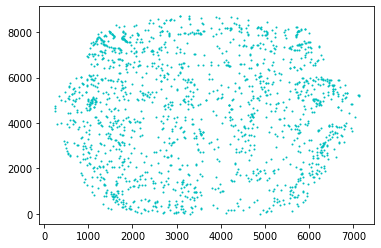

In [17]:
plt.scatter(sub.x,sub.y,s=1,facecolor='c')